In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

# Import data

In [66]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/2_Linear_Regression/'
df = pd.read_csv(path + 'hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Transform

In [67]:
from word2number import w2n

In [68]:
def handle_null_values(word):
    if pd.isnull(word):  # Check if the value is NaN
        return None
    else:
        try:
            return w2n.word_to_num(word)  # Convert word to number
        except ValueError:
            # print(f"Invalid number word: {word}")
            return None  # Return None for invalid number words

handle_null_values('')

In [69]:
df['experience'] = df['experience'].apply(lambda x: handle_null_values(x))
df 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


# Handle missing values

In [70]:
np.round(np.mean(df['test_score(out of 10)']))

8.0

In [71]:
# mean_exp = np.round(np.mean(df['experience']))
mean_test = np.round(np.mean(df['test_score(out of 10)']))

df['experience'] = df['experience'].fillna(0)
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_test)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


# Visualize

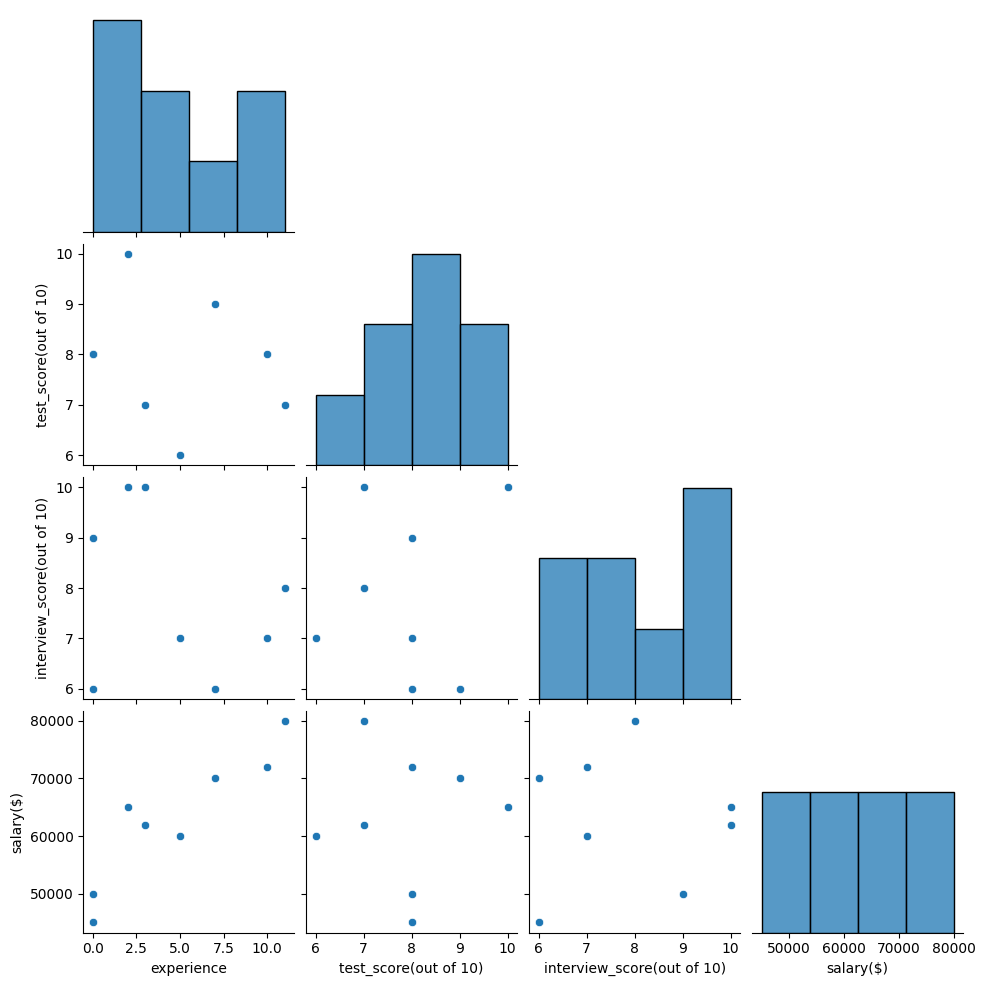

In [72]:
sns.pairplot(df, corner=True)

# Model

In [73]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [74]:
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
model.fit(X,y)


LinearRegression()

In [77]:
model.score(X, y)

0.9616780002577959

In [78]:
model.predict([[2,9,6]])

c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [79]:
model.predict([[12,10,10]])

c:\Users\84393\miniconda3\envs\venv_ker2\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])